# Coding exercises

## Iteration

Compute $\sqrt{2}$ using the recurrence relation

$$a_{n+1} = \frac{1}{2}(a_{n} + 2/a_{n})$$

where $a_{0}=1$. Now use the `decimal` module to compute $\sqrt{2}$ to 100 decimal places (https://docs.python.org/3/library/decimal.html). How many iterations are needed?

Recall the proof of convergence of this sequence to the limit $\sqrt{2}$ from your first year mathematical analysis course by applying the algebra of limits.

In [1]:
import decimal
decimal.getcontext().prec = 102
decimal.getcontext().traps[decimal.FloatOperation] = True

# Set up our Decimal instances
two = decimal.Decimal('2')
one_half = decimal.Decimal('0.5')
sqrt_two = two.sqrt()
value = decimal.Decimal('1')

# Compute the sequence defined by the recurrence relation until either it matches sqrt(2) to the required precision
# or
index = 0
while value != sqrt_two:
    new_value = one_half * (value + (two / value))
    if new_value == value:
        print('Sequence stabilised to 101 decimal places')
        break
    else:
        value = new_value
        index += 1
print('Number of iterations required to compute sqrt(2) to 101 decimal places:', index)
print('Calculated value (prec = 102):\n', value)
print('True value (prec = 102):\n', sqrt_two)
print('Calculated value (rounded to 100 dp):\n', round(value, 100))
print('True value (rounded to 100 dp):\n', round(sqrt_two, 100))

Number of iterations required to compute sqrt(2) to 101 decimal places: 8
Calculated value (prec = 102):
 1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157274
True value (prec = 102):
 1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157274
Calculated value (rounded to 100 dp):
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
True value (rounded to 100 dp):
 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Pisano periods

Write a function to compute the Fibonacci sequence. Now modify the function to compute the Fibonacci sequence modulo $N$, using the `%` operator to find the remainder upon division.

For example, modulo $N=4$ the sequence $0,1,1,2,3,5,8,13,21,34,55,89,\ldots$ becomes $0,1,1,2,3,1,0,1,1,2,3,1,\ldots$
Can you see a repeating sequence here?

Write a function to compute the Pisano period $\pi(N)$: the length of the repeating sequence of Fibonacci numbers modulo $N$ (e.g. $\pi(4)=6$). What is $\pi(N = 144)$?

Read more at http://en.wikipedia.org/wiki/Pisano_period

In [2]:
def fib_seq(length):
    sequence = [0, 1]
    if length <= 2:
        return sequence
    else:
        for i in range(length-2):
            sequence.append(sequence[-2] + sequence[-1])
    return sequence

def fib_seq_mod(length, modulus):
    return [value % modulus for value in fib_seq(length)]

def pisano_period(modulus):
    if modulus == 1:
        return 1
    sequence = [0, 1, 1]
    counter = 2
    while (sequence[-2], sequence[-1]) != (1, 0):
        sequence.append((sequence[-2] + sequence[-1]) % modulus)
        counter += 1
    assert counter == len(sequence) - 1
    return counter, sequence

def pisano_period_results(modulus):
    results = pisano_period(modulus)
    results_string = """Fibonacci sequence:
{fib_seq}
modulo {modulus}:
{fib_seq_mod}
Pisano period pi({modulus}) = {period}
""".format(fib_seq=fib_seq(length=results[0] + 1),
           modulus=modulus,
           fib_seq_mod=results[1],
           period=results[0])
    return results_string

# for modulus in range(2, 6):
#     print(pisano_period_results(modulus))
print(pisano_period_results(144))

Fibonacci sequence:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]
modulo 144:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 0, 89, 89, 34, 123, 13, 136, 5, 141, 2, 143, 1, 0]
Pisano period pi(144) = 24



## Newton-Raphson method

Using the `cmath` module for complex numbers (https://docs.python.org/3/library/cmath.html), and the Newton-Raphson method

$$z_{n+1} = z_{n} - \frac{f(z_{n})}{f'(z_{n})}$$

find the three complex roots of the cubic $f(z) = z^{3} - 1$. Try choosing the initial value $z_{0}$ close to $0$ in the complex plane. Which root does the method converge upon?

Recall that the roots are 
$$ 1, e^{i(2\pi/3)} = -\frac{1}{2} + \frac{\sqrt{3}}{2}, e^{i(4\pi/3)} = -\frac{1}{2} - \frac{\sqrt{3}}{2} $$

For initial values $z_{0}$ close to $0$ the method tends to converge to the real root $z=1$.

Read more at https://en.wikipedia.org/wiki/Newton%27s_method#Complex_functions

In [3]:
import cmath

def newton_raphson(value):
    iter_count = 0
    while value not in (complex(1.0), complex(-0.5, cmath.sqrt(3)/2), complex(-0.5, -cmath.sqrt(3)/2)):
        value = value - (value ** 3 - 1) / (3 * value ** 2)
        iter_count += 1
        if iter_count == 1000:
            print('Gave up after', iter_count, 'iterations.')
            return value
    print('Converged to the root with phase {}*(2*pi/3) after {} iterations.'.format(round(cmath.phase(value)/(2*cmath.pi/3)), 
                                                                                     iter_count))
    return value

newton_raphson(complex(-1, 1))

Converged to the root with phase 1*(2*pi/3) after 6 iterations.


(-0.5+0.8660254037844386j)

# Fracking in Lancashire

In August 2019, hydraulic fracturing (fracking) operations were undertaken at the Preston New Road site in Lancashire. Hydraulic fracturing involves the high-pressure injection of fluid at a depth of ∼ 1.8 km, and typically generates seismic events. The majority of such seismic events are rather weak, with a Local Magnitude (ML) below 0.5 ML. 

At 08:30am on 26th August 2019, a 2.9 ML tremor was recorded by the British Geological Survey (BGS). This event was reportedly felt by some residents of Blackpool, 4 miles from the site, as a loud tremor lasting for 10–15 seconds. Fracking was subsequently suspended at the site.

Seismic events in the last 50 days are recorded by the British Geological Survey (BGS), and separated into [Induced Seismicity](http://www.earthquakes.bgs.ac.uk/induced/recent_uk_events.html) and background tectonic [Earthquakes](http://www.earthquakes.bgs.ac.uk/earthquakes/recent_uk_events.html).

We use the BGS data to produce a histogram plot of the number of induced seismic events by local magnitude.

## Import the data

In [4]:
import pandas as pd
%matplotlib inline
# Get the latest data from the website today, or read from a local file of data extracted on 2019-10-01
url = 'http://www.earthquakes.bgs.ac.uk/induced/recent_uk_events.html'
df = pd.read_html(url, header=0)[0]
# df = pd.read_csv(r"data/induced_seismic_events_50days_20191001.csv")

## Plot the results

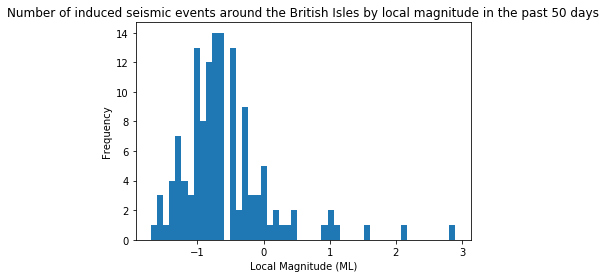

In [5]:
ax = df.Mag.plot.hist(bins=50)
ax.set(xlabel='Local Magnitude (ML)',
      title='Number of induced seismic events around the British Isles by local magnitude in the past 50 days');